# FloodFill

**문제 설명**

    n x m 크기 도화지에 그려진 그림의 색깔이 2차원 리스트로 주어집니다. 같은 색깔은 같은 숫자로 나타난다고 할 때, 그림에 있는 영역은 총 몇 개인지 알아내려 합니다. 영역이란 상하좌우로 연결된 같은 색상의 공간을 말합니다.

    예를 들어, [[1,2,3], [3,2,1]] 같은 리스트는 다음과 같이 표현할 수 있습니다.
    
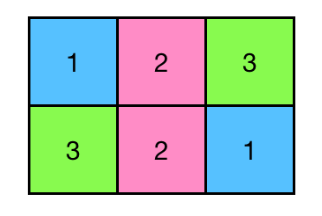

    이때, 이 그림에는 총 5개 영역이 있습니다.

    도화지의 크기 n과 m, 도화지에 칠한 색깔 image가 주어질 때, 그림에서 영역이 몇 개 있는지 리턴하는 solution 함수를 작성해주세요.
    
**제한 사항**

- n과 m은 1 이상 250 이하인 정수입니다.
- 그림의 색깔은 1 이상 30000 미만인 정수로만 주어집니다.

**입출력 예**

| n | m| images|
|:--:|:---:|:---|
|2|3|[[1, 2, 3], [3, 2, 1]]|
|3|2|[[1, 2], [1, 2], [4, 5]]|

입출력 예 #1

        앞서 설명한 예와 같습니다.


입출력 예 #2
    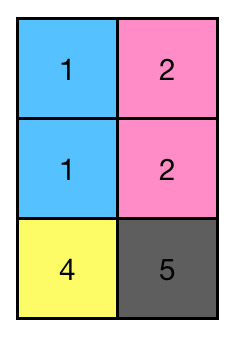
        
        주어진 이미지는 다음과 같이 표현할 수 있습니다.

- BFS 혹은 DFS를 이용하는 문제다.
- DFS = 깊이 우선 탐색 -> 재귀 함수를 많이 사용
- 파이썬에서 재귀 호출은 시간 초과 발생
- 꼬리 재귀 컴파일러가 알아서 최적화 / 파이썬은 제공 X
- 파이썬에서 재귀 호출은 느리기 때문에 가급적 BFS를 쓰는 것이 좋다.

- 큐를 이용한 알고리즘
- N X M 순회

- 팁! . 코드를 간결하게 하기 위해 방향 처리 변수 directions에서 처리

In [1]:
from collections import deque

def solution(n, m, image):
    
    answer = 0 
    
    # 오른쪽, 왼쪽, 위, 아래 이동
    directions = [(0,1),(0,-1),(-1,0),(1,0)]
    
    for sy in range(n):
        for sx in range(m):
            if image[sy][sx] == float('inf'):
                continue            
            target_color = image[sy][sx]
            queue = deque([(sy,sx)])
                        
            while queue:
                
                y, x = queue.popleft() # list의 pop은 시간복잡도 O(N)이기 때문에 O(1)로 하기 위해 DEQUE 사용
                
                for dy, dx in directions:
                    py = y + dy
                    px = x + dx
                    if px >= m or px < 0 or py >= n or py < 0:
                        continue
                    
                    if image[py][px] == target_color:
                        image[y + dy][x + dx] = float('inf')
                        queue.append((y+dy, x+dx))

            answer += 1
            
    return answer

In [3]:
# Test Case 1
n = 2
m = 3
image = [[1, 2, 3], [3, 2, 1]]
assert 5 == solution(n, m, image)

In [4]:
# Test Case 2
n = 3
m = 2
image = [[1, 2], [1, 2], [4, 5]]
assert 4 == solution(n, m, image)

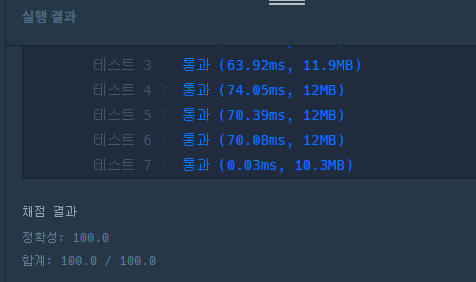